#### Summary

This project is about predicting the doctors consultation fees for given inputs. We will have analyse the data and show the underlying factors which influence the consultation fees.

There might be many factors which may influence such as:-
1) Qualification of doctor
2) Specialisation of doctor
3) Location where doctor is practising
4) Experience of the doctor
5) Income of people where doctor is practising etc

We need to advise on the factors which influence the price and also build a model which predicts the fees accurately.
Since the target is not categorical, we will have to test regression techniques to build the final model. 

We have been given the training set and test set. Both the dataset will go through the analysis and pre processing. After building the final model, the test data set will be used for making predictions.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing training and test dataset
df=pd.read_excel("doc_train.xlsx")
dftest=pd.read_excel("doc_test.xlsx")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

Qualification           Experience  \
0                                 BHMS, MD - Homeopathy  24 years experience   
1                          BAMS, MD - Ayurveda Medicine  12 years experience   
2                        MBBS, MS - Otorhinolaryngology   9 years experience   
3                                   BSc - Zoology, BAMS  12 years experience   
4                                                  BAMS  20 years experience   
5                                                  BAMS   8 years experience   
6                                                  BHMS  42 years experience   
7                                                   BDS  10 years experience   
8                           MBBS, MD - General Medicine  14 years experience   
9                                              BSc, BDS  23 years experience   
10                                  MBBS, MS, DNB - ENT   5 years experience   
11                                                 BAMS   7 years experience   
12                                             BDS, MDS   9 years experience   
13              BDS, MDS - Oral & Maxillofacial Surgery  21 years experience   
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...  12 years experience   
15                          MBBS, MD - General Medicine  10 years experience   
16           MBBS, Diploma in Otorhinolaryngology (DLO)  24 years experience   
17                                 MBBS, MF- Homeopathy   5 years experience   
18                                       MBBS, MS - ENT  19 years experience   
19                                                 MBBS  19 years experience   
20                                        MDS, DNB, BDS  21 years experience   
21                                      MBBS, DNB - ENT  14 years experience   
22                                                 MBBS  41 years experience   
23    MBBS, Fellowship of College of General Practic...  31 years experience   
24                                           MBBS, DDVL  23 years experience   
25                                                  BDS   5 years experience   
26                                    MBBS, IBCLC (USA)  25 years experience   
27    MBBS, MD - General Medicine, Post Graduate Dip...  12 years experience   
28                                             BDS, MDS  16 years experience   
29                         Diploma in Dermatology, MBBS  15 years experience   
30         MBBS, DDVL, Fellowship in Aesthetic Medicine   7 years experience   
31                                                  BDS  11 years experience   
32                                       MBBS, MS - ENT  14 years experience   
33                DM - Neurology, MD - Pediatrics, MBBS  23 years experience   
34                                                 BAMS   9 years experience   
35    BDS, MDS - Oral & Maxillofacial Surgery, Fello...  15 years experience   
36                                                  BDS  10 years experience   
37                         BHMS, Diploma in Cosmetology  12 years experience   
38                            MBBS, MS - ENT, DNB - ENT  31 years experience   
39                                           MBBS, AFIH  16 years experience   
40           BDS, MDS - Prosthodontist And Crown Bridge   8 years experience   
41              BHMS, M. D. Hom. (Practice of Medicine)  12 years experience   
42    BAMS, Diploma in Emergency Medicine, Diploma i...  31 years experience   
43                                                 BAMS   8 years experience   
44    MD - Homeopathy, DHMS (Diploma in Homeopathic ...  22 years experience   
45       MBBS, MD - Dermatology , Venereology & Leprosy   7 years experience   
46          BDS, MDS - Oral and Maxillofacial Pathology  16 years experience   
47                                                 MBBS  31 years experience   
48                                           MBBS, DDVL   8 years experience   
49    BDS, MDS - Oral & Maxillofacial Surg

In [3]:
dftest.head()

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Feedback KK Nagar, Chennai  
3                                                NaN  
4  General Dentistry Conservative Dentistry Cosme...

In [4]:
#checking shape of the datasets
print(df.shape)
print(dftest.shape)

#There are 5961 rows and 7 columns in the training dataset and 1987 rows and 6 columns in the test dataset

(5961, 7)
(1987, 6)


In [5]:
#checking the datatypes of the datasets
print(df.dtypes)
print("")
print(df.dtypes)

#Apart from the Fees all datatypes are object

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object


#### checking missing values 


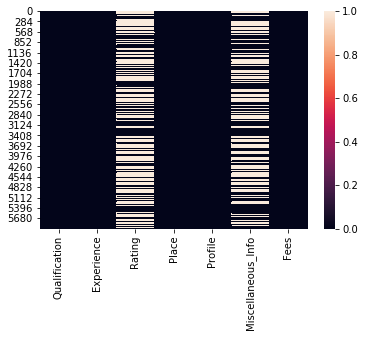

In [6]:
#training dataset
sns.heatmap(df.isnull())

In [7]:
#training dataset
df.isnull().sum()
#There are 3302 values missing in rating column and 2620 values missing in Miscelleaneous information column

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

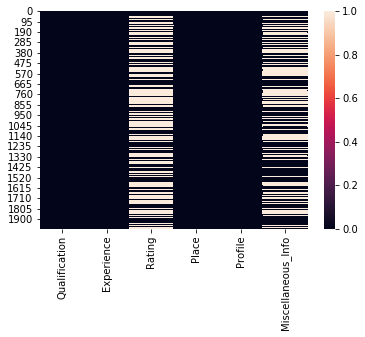

In [8]:
#test dataset
sns.heatmap(dftest.isnull())

In [9]:
#test dataset
dftest.isnull().sum()

#There are 1090 values missing in rating column and 834 values missing in Miscellaneous info

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [10]:
#checking the count of unique values in training dataset

col_name=[]
unique_value=[]

for i in df.columns:
    if df[i].dtype=='O':
        col_name.append(str(i))
        unique_value.append(df[i].nunique())

table=pd.DataFrame()
table['column_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value', ascending=False)
table

column_name  Value
5  Miscellaneous_Info   2998
0       Qualification   1420
3               Place    877
1          Experience     64
2              Rating     51
4             Profile      6

In [11]:
#checking the count of unique values in test dataset

col_name=[]
unique_value=[]

for i in dftest.columns:
    if dftest[i].dtype=='O':
        col_name.append(str(i))
        unique_value.append(dftest[i].nunique())

tabletest=pd.DataFrame()
tabletest['column_name']=col_name
tabletest['Value']=unique_value

tabletest=tabletest.sort_values('Value', ascending=False)
tabletest

column_name  Value
5  Miscellaneous_Info   1084
0       Qualification    630
3               Place    592
1          Experience     57
2              Rating     36
4             Profile      6

 Extracting the numbers from Experience 
Experience has values like 30 years experience. We will first separate them to three columns where numbers and two strings are separated and then drop the two strings columns.

In [12]:
#training dataset
#df[['Exp','Years','string]]=df.Experience.str.split(expand=True)
df[['Exp','Years','string']]=df['Experience'].str.split(" ",expand=True)

In [13]:
#test dataset
dftest[['Exp','Years','string']]=dftest['Experience'].str.split(" ",expand=True)

#### Extracting the city and area name from place
We need to have city separate and area separate for our analysis

In [14]:
df[['Area','City','None']]=df['Place'].str.split("," , expand=True)
dftest[['Area','City']]=dftest['Place'].str.split("," , expand=True)

In [15]:
#drop the other two columns, years and string and also Experience
df1=df.drop(['Years','string','Experience','Place','None'],axis=1)
dftest1=dftest.drop(['Years','string','Experience','Place'],axis=1)

In [16]:
#changing the datatype of Exp column to integer
df1['Exp']=df1['Exp'].astype(int)
dftest1['Exp']=dftest1['Exp'].astype(int)
df1['Exp'].dtype

dtype('int32')

In [17]:
#Checking the dataset whether changes have been taken place correctly
df1.head()

Qualification Rating         Profile  \
0           BHMS, MD - Homeopathy   100%       Homeopath   
1    BAMS, MD - Ayurveda Medicine    98%        Ayurveda   
2  MBBS, MS - Otorhinolaryngology    NaN  ENT Specialist   
3             BSc - Zoology, BAMS    NaN        Ayurveda   
4                            BAMS   100%        Ayurveda   

                                  Miscellaneous_Info  Fees  Exp  \
0               100% 16 Feedback Kakkanad, Ernakulam   100   24   
1              98% 76 Feedback Whitefield, Bangalore   350   12   
2                                                NaN   300    9   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250   12   
4              100% 4 Feedback Keelkattalai, Chennai   250   20   

                Area        City  
0           Kakkanad   Ernakulam  
1         Whitefield   Bangalore  
2    Mathikere - BEL   Bangalore  
3  Bannerghatta Road   Bangalore  
4       Keelkattalai     Chennai

In [18]:
dftest1.head()

Qualification Rating           Profile  \
0                                             MBBS    NaN  General Medicine   
1       MBBS, Diploma in Otorhinolaryngology (DLO)    NaN    ENT Specialist   
2                                       MBBS, DDVL    70%    Dermatologists   
3                                             BAMS    NaN          Ayurveda   
4  BDS, MDS - Conservative Dentistry & Endodontics   100%           Dentist   

                                  Miscellaneous_Info  Exp              Area  \
0                                                NaN   35    Ghatkopar East   
1                                                NaN   31  West Marredpally   
2                   70% 4 Feedback KK Nagar, Chennai   40          KK Nagar   
3                                                NaN    0   New Ashok Nagar   
4  General Dentistry Conservative Dentistry Cosme...   16    Kanakpura Road   

         City  
0      Mumbai  
1   Hyderabad  
2     Chennai  
3       Delhi  
4   Bangalore

In [19]:
df1[df1.isnull().any(axis=1)]

Qualification Rating  \
2                        MBBS, MS - Otorhinolaryngology    NaN   
3                                   BSc - Zoology, BAMS    NaN   
5                                                  BAMS    NaN   
6                                                  BHMS    NaN   
8                           MBBS, MD - General Medicine    NaN   
9                                              BSc, BDS    NaN   
10                                  MBBS, MS, DNB - ENT    NaN   
11                                                 BAMS    NaN   
13              BDS, MDS - Oral & Maxillofacial Surgery    NaN   
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...    NaN   
15                          MBBS, MD - General Medicine    NaN   
16           MBBS, Diploma in Otorhinolaryngology (DLO)    NaN   
17                                 MBBS, MF- Homeopathy    NaN   
21                                      MBBS, DNB - ENT    NaN   
22                                                 MBBS    NaN   
23    MBBS, Fellowship of College of General Practic...    NaN   
24                                           MBBS, DDVL    NaN   
25                                                  BDS    NaN   
28                                             BDS, MDS    NaN   
31                                                  BDS    NaN   
34                                                 BAMS    NaN   
36                                                  BDS    NaN   
39                                           MBBS, AFIH    NaN   
43                                                 BAMS    NaN   
45       MBBS, MD - Dermatology , Venereology & Leprosy    NaN   
47                                                 MBBS    NaN   
49    BDS, MDS - Oral & Maxillofacial Surgery, MFDS RCS    NaN   
50                                                 MBBS    NaN   
51                                                 BAMS    NaN   
52                                           MBBS, DDVL    NaN   
58    MBBS, Member of the Royal College of Physician...    NaN   
60       MBBS, MD - Dermatology , Venereology & Leprosy    NaN   
63                                                 BHMS    NaN   
64                                                 BHMS    NaN   
68                     BHMS, Diploma In Skin Aesthetics    NaN   
71                       MBBS, MS - Otorhinolaryngology    NaN   
72                                                 BHMS    NaN   
73                                                 MBBS    NaN   
76           BDS, MDS - Prosthodontist And Crown Bridge    NaN   
79        MDS-Oral Pathology and Oral Microbiology, BDS    NaN   
80    MBBS, MD - General Medicine, FRCP, Doctor of S...    NaN   
81                                                  BDS    NaN   
82                                                 BAMS    NaN   
85                          MBBS, MD - General Medicine    NaN   
87       MBBS, MD - Dermatology , Venereology & Leprosy    NaN   
89                                                 MBBS    NaN   
90    BAMS, Post Graduate Diploma in Emergency Servi...    NaN   
91    Get inspired by remarkable stories of people l...    NaN   
92    BAMS, MD - Acupuncture, Master of Hospital Adm...    NaN   
97                                           MBBS, DDVL    NaN   
98                                                 BAMS    NaN   
100                               BHMS, MD - Homeopathy    NaN   
105                                          MBBS, FRCP    NaN   
107                             BDS, MDS - Periodontics    NaN   
109                                                 BDS    NaN   
110                                         MRCPS, MBBS    NaN   
114     MDS - Conservative Dentistry & Endodontics, BDS   100%   
115                         MBBS, MD - General Medicine    NaN   
116                                                 BDS    NaN   
118                                                 BDS    NaN   
119             

In [20]:
# replacing the % in the column with nothing since we need to convert the object to integer datatype
df1['Rating']=df1['Rating'].str.replace("%","")

In [21]:
#converting the datatype from object to float as it won't accept integer as there as Nan values
df1['Rating']=df1['Rating'].astype(float)
df1['Rating'].dtype

dtype('float64')

In [22]:
# filling the nan values with the average ratings
df1['Rating']=df1['Rating'].fillna(df1['Rating'].mean())

In [23]:
#finally checking whether there are any null values in the training dataset
df1['Rating'].isnull().sum()

0

In [24]:
# changing the same as above in testing dataset
dftest1['Rating']=dftest1['Rating'].str.replace("%","")
dftest1['Rating']=dftest1['Rating'].astype(float)
dftest1['Rating']=dftest1['Rating'].fillna(dftest1['Rating'].mean())
dftest1['Rating'].isnull().sum()

0

#### Dropping column Miscellaneous Info
The miscellaneous column is not uniform. In some rows, it is missing, is some rows rating and area is merged, in some treatment is mentioned, in some fees is mentioned. So it is better to drop that column in both the datasets.


In [25]:
df2=df1.drop(['Miscellaneous_Info'],axis=1)
dftest2=dftest1.drop(['Miscellaneous_Info'],axis=1)

df2.head(10)


Qualification      Rating           Profile  Fees  Exp  \
0           BHMS, MD - Homeopathy  100.000000         Homeopath   100   24   
1    BAMS, MD - Ayurveda Medicine   98.000000          Ayurveda   350   12   
2  MBBS, MS - Otorhinolaryngology   94.643475    ENT Specialist   300    9   
3             BSc - Zoology, BAMS   94.643475          Ayurveda   250   12   
4                            BAMS  100.000000          Ayurveda   250   20   
5                            BAMS   94.643475          Ayurveda   100    8   
6                            BHMS   94.643475         Homeopath   200   42   
7                             BDS   99.000000           Dentist   200   10   
8     MBBS, MD - General Medicine   94.643475  General Medicine   100   14   
9                        BSc, BDS   94.643475           Dentist   100   23   

                Area        City  
0           Kakkanad   Ernakulam  
1         Whitefield   Bangalore  
2    Mathikere - BEL   Bangalore  
3  Bannerghatta Road   Bangalore  
4       Keelkattalai     Chennai  
5              Porur     Chennai  
6         Karol Bagh       Delhi  
7            Arekere   Bangalore  
8           Old City   Hyderabad  
9             Athani   Ernakulam

In [26]:
dftest2.dtypes

Qualification     object
Rating           float64
Profile           object
Exp                int32
Area              object
City              object
dtype: object

#### Distribution of data

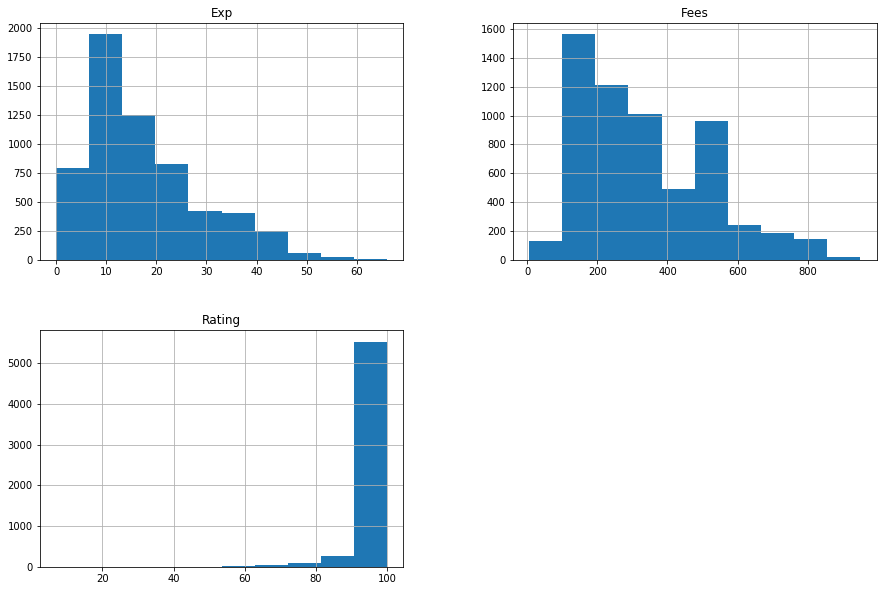

In [27]:
#checking the distribution of the data
#training data
df2.hist(figsize=(15,10))
plt.show()

Observations
1. Most of the doctors have experience of 8-12 years.
2. Most of the ratings are between 90-100.
3. Most of the fees is between 150-400.

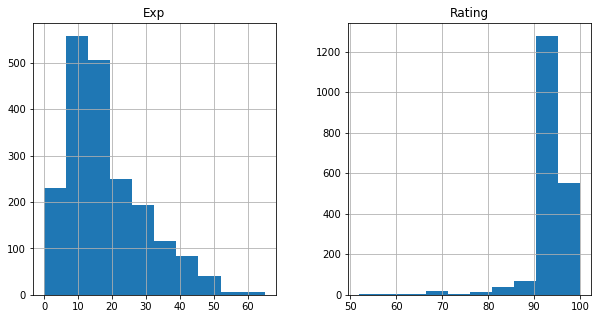

In [28]:
#checking the distribution of the data
#test data
dftest2.hist(figsize=(10,5))
plt.show()

1. Most of the doctors have experience of 8-20 years.
2. Most of the ratings are between 90-95.

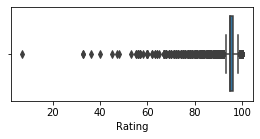

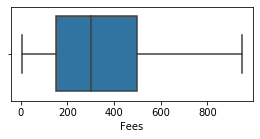

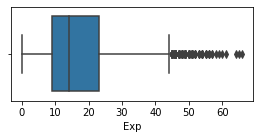

In [29]:
#checking the outliers of the data
#training data
for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

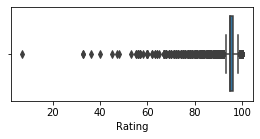

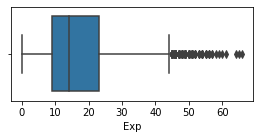

In [30]:
#checking the outliers of the data
#test data
for i in dftest2.columns:
    if dftest2[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df2[i])

Observations:
1. Rating and Exp columns have outliers in the training and test datasets

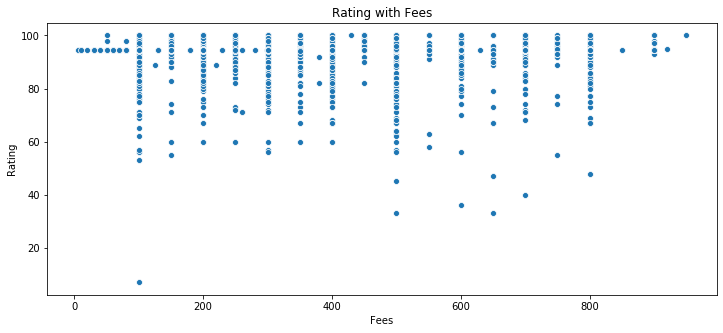

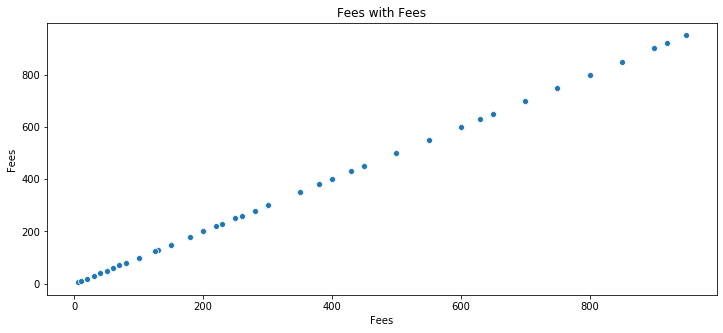

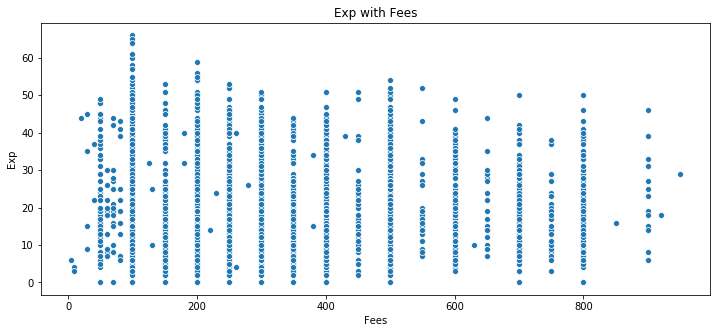

In [31]:
#scatter plots. checking the attributes relationship with the target 'Fees'. Since only training data has fees column, 
#we will use only training data here.

for i in df2.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Fees')
        sns.scatterplot(x=df2['Fees'], y=df2[i], data=df2)
        plt.show()

Observations
1. None of the numerical columns show positive relationship with the fees

#### Statistical Analysis

In [32]:
df2.describe()

Rating         Fees          Exp
count  5961.000000  5961.000000  5961.000000
mean     94.643475   307.944640    17.303976
std       5.244204   190.920373    11.142798
min       7.000000     5.000000     0.000000
25%      94.643475   150.000000     9.000000
50%      94.643475   300.000000    14.000000
75%      96.000000   500.000000    23.000000
max     100.000000   950.000000    66.000000

Observation
1. Mean and median rating is 94.64 where as minimum rating is 7 indicating outlier.
2. Avg and Median fees is 307 and 300.
3. Avg and median experience is 17 and 14 years respectively. There might be outliers which needs to be checked later.

In [33]:
dftest2.describe()

Rating          Exp
count  1987.000000  1987.000000
mean     94.441472    17.874685
std       5.089688    11.366764
min      52.000000     0.000000
25%      94.441472     9.000000
50%      94.441472    15.000000
75%      96.000000    24.000000
max     100.000000    65.000000

1) In rating the minimum value is 52.
2) Exp mean is 17 and max is 65. Need to check for outliers.

#### Analysing by grouping the data and its effect with fees
###### Here since only training dataset has fees column, we are not considering test data for analysis

In [34]:
df2.groupby('Profile').mean()

Rating        Fees        Exp
Profile                                           
Ayurveda          95.042093  238.968193  16.089059
Dentist           96.574827  238.199714  13.244094
Dermatologists    93.941795  393.133462  14.969052
ENT Specialist    92.418727  387.321429  19.766484
General Medicine  93.629020  313.908781  24.864450
Homeopath         95.264705  306.499407  15.381969

Observations
1. The average fees of dermatologists is highest at 393 and least is Ayurveda and Dentist.

In [35]:
df2.groupby('City').mean()

Rating        Fees        Exp
City                                                 
 Bangalore           94.203579  328.842607  16.054054
 Chennai             95.099383  283.602339  18.014035
 Coimbatore          95.215673  154.298246  16.785088
 Delhi               94.411103  363.006757  18.646959
 Ernakulam           95.302470  188.431373  16.712418
 Hyderabad           94.365380  307.507886  15.904311
 Mumbai              94.993393  308.292863  18.488105
 Sector 5            94.643475  250.000000  11.000000
 Thiruvananthapuram  95.170776  167.267442  15.941860

Observations
1. Average doctor fees at big cities like Delhi and Bangalore is highest at 363 and 328 respectivley.
2. At smaller cities is it lowest like Coimbatore at 154 and Thiruvananthapuram at 167.

#### Checking correlation

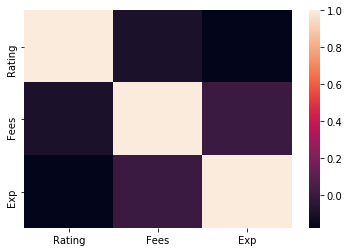

In [36]:
#training data
sns.heatmap(df2.corr())

In [37]:
#training data
df2.corr()

Rating      Fees       Exp
Rating  1.000000 -0.090106 -0.177438
Fees   -0.090106  1.000000  0.002117
Exp    -0.177438  0.002117  1.000000

In [38]:
#test data
dftest2.corr()

Rating       Exp
Rating  1.000000 -0.155206
Exp    -0.155206  1.000000

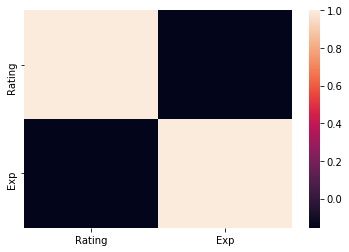

In [39]:
sns.heatmap(dftest2.corr())

Observations
1. Both in training and test data, there is no positive correlation between the variables

#### Encoding the data

In [40]:
#training data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2['Qualification']=lb.fit_transform(df2['Qualification'].astype(str))
df2['Profile']=lb.fit_transform(df2['Profile'].astype(str))
df2['Area']=lb.fit_transform(df2['Area'].astype(str))
df2['City']=lb.fit_transform(df2['City'].astype(str))

In [41]:
df2.head()

Qualification      Rating  Profile  Fees  Exp  Area  City
0            401  100.000000        5   100   24   296     4
1             73   98.000000        0   350   12   855     0
2           1135   94.643475        3   300    9   452     0
3            464   94.643475        0   250   12    68     0
4             10  100.000000        0   250   20   335     1

In [42]:
#test data
for i in dftest2.columns:
    if dftest2.columns.dtype=='O':
        dftest2[i]=lb.fit_transform(dftest2[i].astype(str))

In [43]:
dftest2.head()

Qualification  Rating  Profile  Exp  Area  City
0            241      31        4   28   142     6
1            340      31        3   24   577     5
2            258       9        2   34   212     1
3              6      31        0    0   373     3
4             79       0        1    7   231     0

#### removing outliers

In [44]:
#training dataset
from scipy.stats import zscore
z=np.abs(zscore(df2))
print("The datashape before removing outliers is ", df2.shape)
df3=df2[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df3.shape)

The datashape before removing outliers is  (5961, 7)
The datashape after removing outliers is  (5780, 7)


In [45]:
#testing dataset
from scipy.stats import zscore
z=np.abs(zscore(dftest2))
print("The datashape before removing outliers is ", dftest2.shape)
dftest3=dftest2[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", dftest3.shape)

The datashape before removing outliers is  (1987, 6)
The datashape after removing outliers is  (1987, 6)


#### splitting the data into input and output variables
The training data will be split into input and output variables. Testing dataset has only input variables. Hence no need to spilt the same.

In [46]:
y=pd.DataFrame(df3['Fees'])
x=df3.drop('Fees', axis=1)
x.head()

Qualification      Rating  Profile  Exp  Area  City
0            401  100.000000        5   24   296     4
1             73   98.000000        0   12   855     0
2           1135   94.643475        3    9   452     0
3            464   94.643475        0   12    68     0
4             10  100.000000        0   20   335     1

In [47]:
y.head()

Fees
0   100
1   350
2   300
3   250
4   250

#### Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

0         1         2         3         4         5
0 -0.452828  1.535600  1.546424  0.668589 -0.455923  0.375970
1 -1.243080  0.892746 -1.450200 -0.455340  1.717327 -1.315491
2  1.315601 -0.186132  0.347774 -0.736323  0.150565 -1.315491
3 -0.301042 -0.186132 -1.450200 -0.455340 -1.342329 -1.315491
4 -1.394866  1.535600 -1.450200  0.293946 -0.304301 -0.892626

In [49]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [50]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.10330916044104232 is achieved at random state 74


In [51]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=74,test_size=0.20)

In [52]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [54]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [55]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mae'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.10330916044104232
The cross val score is 0.07458103199555625
The mean squared error is 31161.45905259741
The root mean squared error is 176.52608603998846




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.12205821222946389
The cross val score is 0.11039132540214418
The mean squared error is 30509.899134948097
The root mean squared error is 174.67083080740213




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=No

In [56]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

Model   R2score  Cross_val_score  Mean Squared Error  \
0       LinearRegression  0.103309         0.074581        31161.459053   
1    KNeighborsRegressor  0.122058         0.110391        30509.899135   
2  DecisionTreeRegressor -0.447005        -0.424236        50285.770761   
3                    SVR  0.115669         0.102619        30731.925427   

   Root Mean Squared Error  
0               176.526086  
1               174.670831  
2               224.244890  
3               175.305235

In [57]:
#Let us try to boost our scores by trying boosters and lasso and ridge

#### Lasso

In [58]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.001}

In [59]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=0.001)
max_r2_score(ls,x,y)

The maximum r2 score 0.1033087269070917 is achieved at random state 74


In [60]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.0745810710496158


#### Ridge

In [61]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [62]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.10330401774658537 is achieved at random state 74


In [63]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.07458184528418366


#### Ensemble Techniques

#### Random Forest

In [64]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [65]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [66]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.2386446701876621 is achieved at random state 59


In [67]:
#Let us check the cross val score for Random Forest
cross=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.18407912491260278


#### GradientBoostingRegressor

In [68]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [69]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.2469089602237199 is achieved at random state 71


In [70]:
#Let us check the cross val score for Gradient Boosting Regressor
cross=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.2090911458586889


In [71]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [72]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=0.01)
max_r2_score(ad,x,y)

The maximum r2 score 0.16530598263411111 is achieved at random state 64


In [73]:
#Let us check the cross val score for AdaBoost Regressor
cross=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.13550497083331753


In [74]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.103,0.103,0.236,0.246,0.166],'Cross_val_score':[0.074,0.074,0.184,0.209,0.135]})
result2

Boosters  R2 Score  Cross_val_score
0                   Lasso     0.103            0.074
1                   Ridge     0.103            0.074
2   RandomForestRegressor     0.236            0.184
3  GradientBoostRegressor     0.246            0.209
4       AdaBoostRegressor     0.166            0.135

In [75]:
#None of the algorithms are giving good scores, Gradient Boosting Regressor is giving little better scores. 
#So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=71,test_size=0.20)
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
gb.fit(train_x,train_y)
pred=gb.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.24574374461587467
The cross val score is 0.20909840427013787


In [76]:
#predicting the test data
predtest=gb.predict(dftest3)
pd.DataFrame(predtest).to_csv("Doctor_consultation_fees_predictions.csv")

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gb,'Project13_Doctor_Consultation_fees.pkl')

['Project13_Doctor_Consultation_fees.pkl']